In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
total_dep_score = pd.read_csv('../data/0&1/total_prim_diag.csv')

X_t = total_dep_score.copy()
del X_t['prim_diag']

y_t = total_dep_score['prim_diag']

In [3]:
y_t.value_counts() 

0.0    2430
1.0     613
Name: prim_diag, dtype: int64

In [4]:
2430 /(2430 + 613)

0.7985540584949063

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             2          1          1          1        2        3
2             3          3          3          1        2        2
3             1          2          1          1        1        2
4             2          3          0          0        2        2
...         ...        ...        ...        ...      ...      ...
3038          3          3          2          2        2        3
3039          2          3          1          1        1        2
3040          0          0          0          0        2        0
3041          2          3          1          1        1        2
3042          1          2          2          2        0        1

[3043 rows x 6 columns]
0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3038    0.0
3039    0.0
3040    0.0
3041    1.0
3042    0.0
Name: prim_diag, Length: 3043, dtype: f

In [6]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_prim_diag.csv')

X_s = sampled_dep_score.copy()
del X_s['prim_diag']

y_s = sampled_dep_score['prim_diag']

In [7]:
y_s.value_counts() 

0.0    613
1.0    613
Name: prim_diag, dtype: int64

In [8]:
print(X_s)
print(y_s)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          2          2        3        2
1             2          2          1          2        2        1
2             1          2          1          1        0        2
3             2          2          0          0        2        2
4             0          0          1          1        1        1
...         ...        ...        ...        ...      ...      ...
1221          2          3          1          1        1        1
1222          0          0          3          3        1        2
1223          3          2          1          2        2        2
1224          3          3          1          1        1        2
1225          3          3          2          2        1        1

[1226 rows x 6 columns]
0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
1221    1.0
1222    0.0
1223    1.0
1224    1.0
1225    1.0
Name: prim_diag, Length: 1226, dtype: f

In [9]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 1. total

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=1)  # 70% training and 30% test

## SVM

In [11]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [12]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}


In [13]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.823658269441402
F1 score micro: 0.823658269441402
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       752
         1.0       0.00      0.00      0.00       161

    accuracy                           0.82       913
   macro avg       0.41      0.50      0.45       913
weighted avg       0.68      0.82      0.74       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


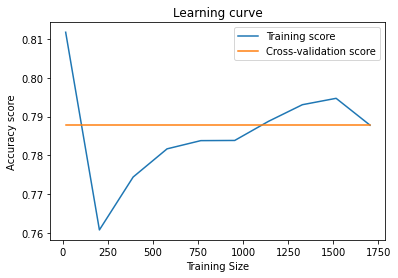

In [14]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [15]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [16]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.78779343        nan 0.78779343 0.78779343
 0.78779343 0.78779343 0.78779343 0.78779343        nan        nan
        nan        nan        nan 0.78779343 0.78779343        nan
 0.78779343 0.78779343        nan        nan 0.78779343        nan
 0.78779343 0.78779343 0.78779343 0.78779343 0.78779343 0.78779343
        nan        nan        nan        nan        nan 0.78779343
 0.78779343        nan 0.78779343 0.78779343        nan        nan
        nan        nan 0.78779343 0.78779343 0.78779343        nan
 0.78779343 0.78779343        nan        nan        nan        nan
        nan 0.78779343 0.78779343        nan 0.78779343 0.78779343
        nan        nan 0.78779343        nan 0.78779343 0.78779343
 0.78779343 0.78779343 0.78779343 0.78779343        nan        nan
        nan        n

In [17]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.823658269441402
F1 score micro: 0.823658269441402
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       752
         1.0       0.00      0.00      0.00       161

    accuracy                           0.82       913
   macro avg       0.41      0.50      0.45       913
weighted avg       0.68      0.82      0.74       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


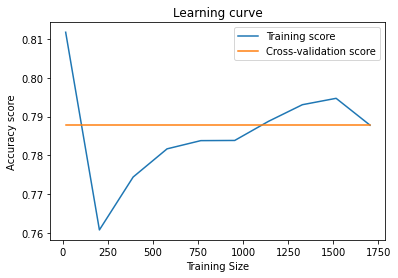

In [18]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## KNN

In [19]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [20]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 23, 'weights': 'uniform'}


In [21]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.7907995618838992
F1 score micro: 0.7907995618838992
F1 score binary: 0.07729468599033816

classification report:
               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       752
         1.0       0.17      0.05      0.08       161

    accuracy                           0.79       913
   macro avg       0.50      0.50      0.48       913
weighted avg       0.71      0.79      0.74       913



[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


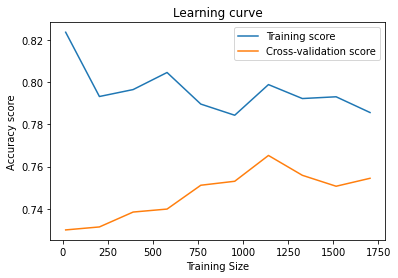

In [22]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Random Forest

In [23]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [24]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 38, 'n_estimators': 38}


In [25]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.8214676889375685
F1 score micro: 0.8214676889375685
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       752
         1.0       0.00      0.00      0.00       161

    accuracy                           0.82       913
   macro avg       0.41      0.50      0.45       913
weighted avg       0.68      0.82      0.74       913



[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


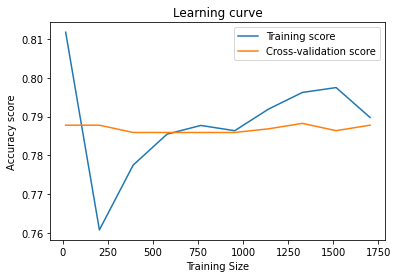

In [26]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=38)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Total Learning Curve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s


[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]
[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s


[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s


[learning_curve] Training set sizes: [  17  204  391  579  766  954 1141 1329 1516 1704]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


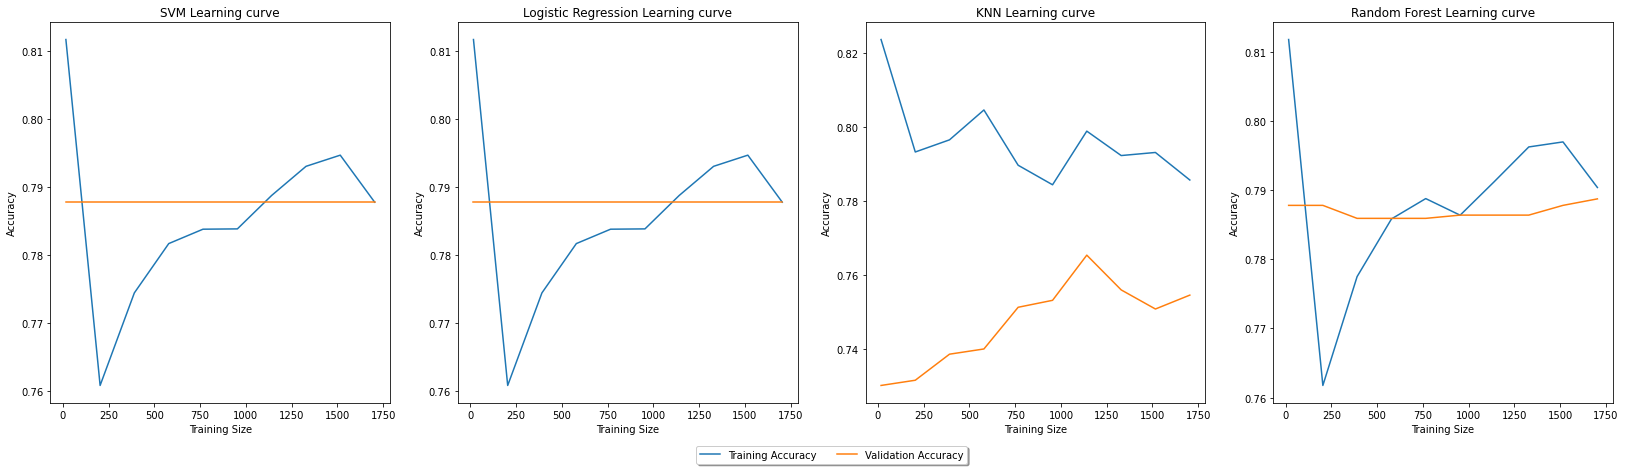

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest 
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=38)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)

# 2. sampled

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)  # 70% training and 30% test

# SVM 

In [29]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [30]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [31]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.49728260869565216
F1 score micro: 0.49728260869565216
F1 score binary: 0.5219638242894057

classification report:
               precision    recall  f1-score   support

         0.0       0.49      0.45      0.47       182
         1.0       0.50      0.54      0.52       186

    accuracy                           0.50       368
   macro avg       0.50      0.50      0.50       368
weighted avg       0.50      0.50      0.50       368



[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


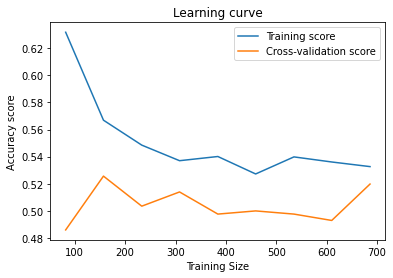

In [32]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='linear', C=10, gamma=0.0001)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Logistic Regression

In [33]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [34]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}


/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.50238678        nan 0.48487012 0.46505508
 0.46505508 0.46505508 0.46505508 0.46505508        nan        nan
        nan        nan        nan 0.4871277  0.4871277         nan
 0.4871277  0.4871277         nan        nan 0.50238678        nan
 0.48487012 0.46505508 0.46505508 0.46505508 0.46505508 0.46505508
        nan        nan        nan        nan        nan 0.4871277
 0.4871277         nan 0.4871277  0.4871277         nan        nan
        nan        nan 0.48487012 0.46505508 0.46505508        nan
 0.46505508 0.46505508        nan        nan        nan        nan
        nan 0.4871277  0.4871277         nan 0.4871277  0.4871277
        nan        nan 0.50238678        nan 0.50580035 0.46622467
 0.46622467 0.47320141 0.46622467 0.46622467        nan        nan
        nan        nan

In [35]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.4945652173913043
F1 score micro: 0.4945652173913043
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       182
         1.0       0.00      0.00      0.00       186

    accuracy                           0.49       368
   macro avg       0.25      0.50      0.33       368
weighted avg       0.24      0.49      0.33       368



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


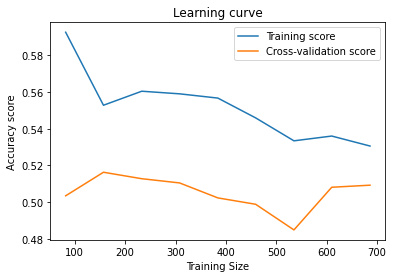

In [36]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='multinomial', penalty='l2', solver='newton-cg')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# KNN

In [37]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [38]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 23, 'weights': 'uniform'}


In [39]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.49728260869565216
F1 score micro: 0.49728260869565216
F1 score binary: 0.3728813559322034

classification report:
               precision    recall  f1-score   support

         0.0       0.49      0.70      0.58       182
         1.0       0.50      0.30      0.37       186

    accuracy                           0.50       368
   macro avg       0.50      0.50      0.48       368
weighted avg       0.50      0.50      0.48       368



[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


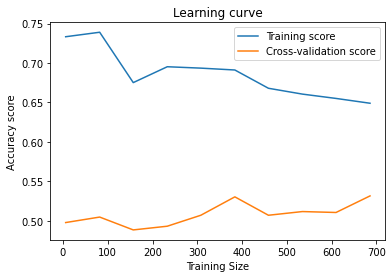

In [40]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=45, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Random Forest

In [41]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [42]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 16}


In [43]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.4782608695652174
F1 score micro: 0.4782608695652174
F1 score binary: 0.4782608695652174

classification report:
               precision    recall  f1-score   support

         0.0       0.47      0.48      0.48       182
         1.0       0.48      0.47      0.48       186

    accuracy                           0.48       368
   macro avg       0.48      0.48      0.48       368
weighted avg       0.48      0.48      0.48       368



[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


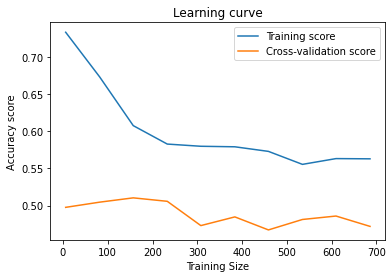

In [44]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=50)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Sampled Learning Curve

[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]
[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]
[learning_curve] Training set sizes: [  6  82 157 233 308 384 459 535 610 686]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


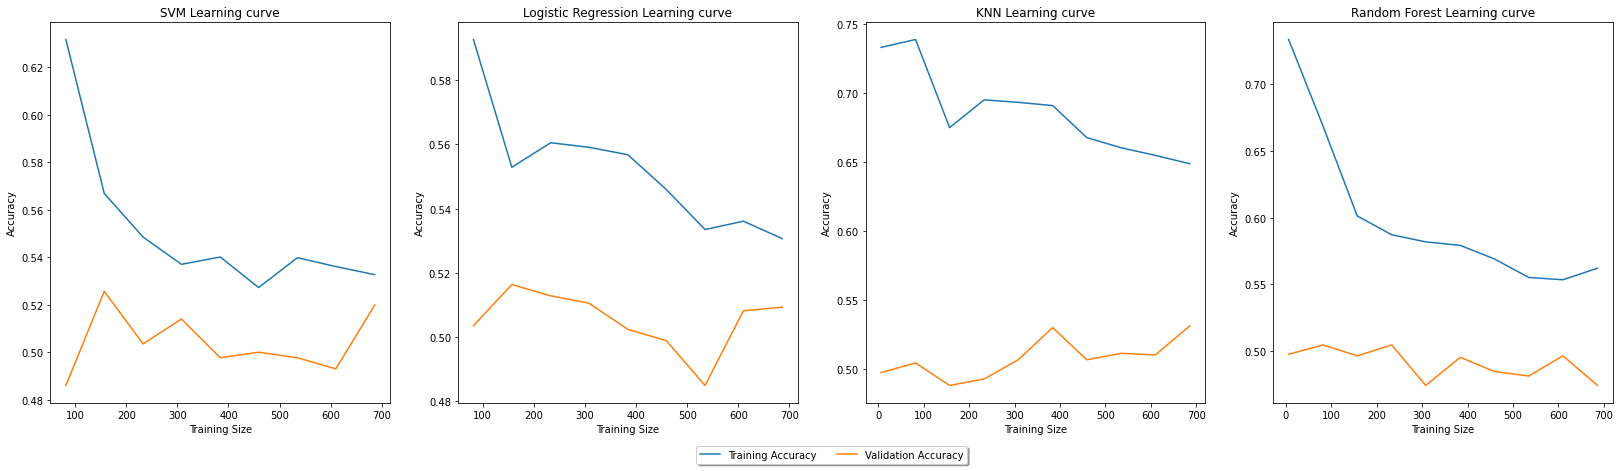

In [45]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

plot_model = svm.SVC(kernel='linear', C=10, gamma=0.0001)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.1, multi_class='multinomial', penalty='l2', solver='newton-cg')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=45, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest 
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=50)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)